In [2]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


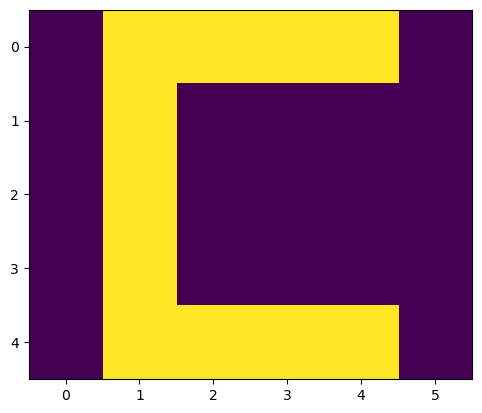

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()


In [42]:
X = np.array([a, b, c])
y = np.array(["A", "B", "C"])

In [43]:
from sklearn.linear_model import LogisticRegression

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# In ra các hệ số của mô hình
print("Các hệ số của mô hình:")
print(model.coef_)

# In ra các bias của mô hình
print("Các bias của mô hình:")
print(model.intercept_)

# Đánh giá độ chính xác của mô hình
accuracy = model.score(X, y)
print("Độ chính xác của mô hình:", accuracy)

Các hệ số của mô hình:
[[ 0.00000000e+00 -1.75799448e-01  1.32863016e-06  1.32863016e-06
  -1.75799448e-01  0.00000000e+00  0.00000000e+00  1.32863016e-06
   0.00000000e+00  0.00000000e+00  7.53733915e-02  0.00000000e+00
   1.75800777e-01  1.32863016e-06  7.53733915e-02  7.53733915e-02
   7.53733915e-02  1.75800777e-01  1.75800777e-01 -1.75799448e-01
   0.00000000e+00  0.00000000e+00 -1.00427386e-01  1.75800777e-01
   1.75800777e-01 -1.75799448e-01 -1.75799448e-01 -1.75799448e-01
  -1.75799448e-01  1.75800777e-01]
 [ 0.00000000e+00  1.02042464e-01 -8.40116130e-06 -8.40116130e-06
   1.02042464e-01  0.00000000e+00  0.00000000e+00 -8.40116130e-06
   0.00000000e+00  0.00000000e+00  2.05466248e-01  0.00000000e+00
  -1.02050865e-01 -8.40116130e-06  2.05466248e-01  2.05466248e-01
   2.05466248e-01 -1.02050865e-01 -1.02050865e-01  1.02042464e-01
   0.00000000e+00  0.00000000e+00  3.07517113e-01 -1.02050865e-01
  -1.02050865e-01  1.02042464e-01  1.02042464e-01  1.02042464e-01
   1.02042464e-01 

In [41]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 ['A' 'B' 'C']


In [38]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 




In [39]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w2)


[[-0.68684399 -2.31073623 -0.41295521]
 [-0.31371196 -1.29075377 -0.75469906]
 [-2.73529309  0.80090018 -0.3557105 ]
 [-0.09488282 -0.16004724 -0.44259362]
 [-0.72384842  0.16719035 -0.17769292]]


In [40]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1_new, w2_new = train(x, y, w1, w2, 0.1, 100)


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None

In [ ]:
print(w2_new)

[[-1.19592756  1.53983167 -3.18585901]
 [-2.56642595 -1.01675185  2.23078111]
 [ 2.12127463 -2.00629895 -1.59681155]
 [ 2.11122836 -1.52573776 -0.10331456]
 [-0.92301478 -2.01876918  1.03533378]]


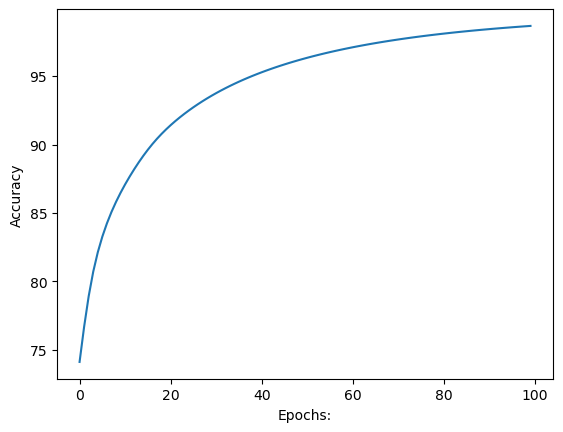

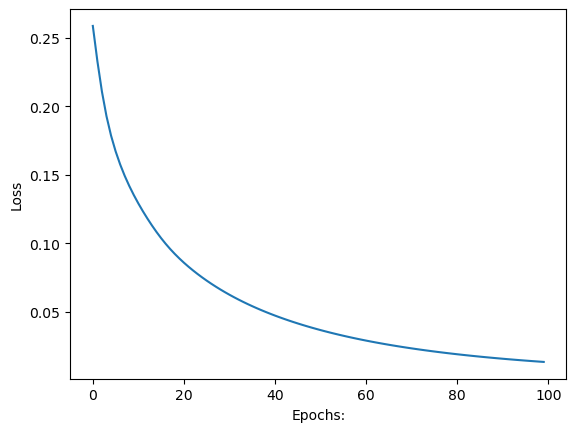

In [ ]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


Image is of letter A.


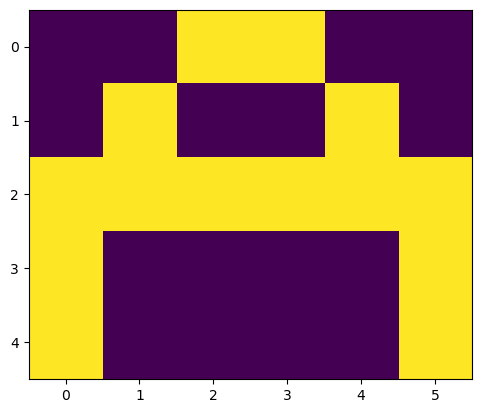

In [ ]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[0], w1_new, w2_new)
